# COMP0124 MAAI Individual Coursework 

This 50-point individual coursework has four parts,
the Matrix Game, the Stochastic Game, the Nonzero-sum Game and Deep Multi-Agent Reinforcement Learning.

## Instructions
1.   To start this CW, please duplicate this notebook at first:
  - Choose "File => Save a copy in Drive" and open/run it in Colab.
  - Or you can download the notebook and run it in your local jupyter notebook server.
2.   For the coding assignment, please write your code at `### TODO ###` blocks or in a new cell. For analysis report, you are free to use as many blocks as you need.
3.   Before submitting your notebook, **make sure that it runs without errors**, we also provide a validation tool in the end of this notebook.
  - To check this, reload your notebook and the Python kernel, and run the notebook from the first to the last cell.
  - Please do not change any methods or variables' name in the notebook, otherwise, you cannot get marking correctly.
  - We would not help you debug the code, if we cannot run your submitted notebook, you will get zero point. 
4.  Download your notebook and submit it on Moodle.
  - Click on "File -> Download .ipynb".
  - Rename your notebook to ***firstname_lastname_studentnumber.ipynb***. (Please strictly follow the naming requirement.)
  - Upload to Moodle.
5. This CW would due by **23:55 26/03/2021**, please submit your .ipynb file through the [submission entrance](https://moodle.ucl.ac.uk/mod/assign/view.php?id=1685901).
6. If you have any questions, please contact TAs: [Minne Li](minne.li@cs.ucl.ac.uk), [Oliver Slumbers](o.slumbers@cs.ucl.ac.uk), [Xihan Li](xihan.li.20@ucl.ac.uk), [Xidong Feng](xidong.feng@cs.ucl.ac.uk), and [Mengyue Yang](m.yang@cs.ucl.ac.uk).

## Part I: Matrix Game (10 points)

We start with the simplest setting: Matrix Game (a.k.a Stage Game/Normal Form Game). In this part, you will try to solve the matrix game with full knowledge of the payoff for each player in the game.



Given a two-player, two-action matrix game, we have the payoff matrices as follows:
$$
\mathbf{R}^1 = \left[\begin{matrix}
0 & 3 \\
1 &2
\end{matrix}\right] 
\quad 
\mathbf{R}^2 = \left[\begin{matrix}
3 & 2 \\
0 & 1
\end{matrix}\right]
$$

Each player selects an action from the action space $\{1,2\}$ which determines the payoffs to the players. If the player 1 chooses action $i$ and the player 2 chooses action $j$, then the player 1 and player2 receive the rewards $r^1_{ij}$ and $r^2_{ij}$ respectively. For example, if both players choose action $1$, then the player 1 would have $r^1_{11}=0$ and player 1 would receive $r^2_{11}=3$.

Then, we can use $\alpha\in [0,1] $ represents the strategy for player 1, where $\alpha$ corresponds to the probability of player 1 selecting the first action (action 1), and $1-\alpha$ is the probability of choosing the second action (action 2). Similarly, we use $\beta$ to be the strategy for player 2.

Given the pair of strategies $(\alpha, \beta)$, we can have the expected payoffs for two players. Denote $V^1(\alpha, \beta)$ and $V^2(\alpha, \beta)$ as the expected payoffs for two players respectively:

$$
\begin{aligned} V^{1}(\alpha, \beta) &=\alpha \beta r^1_{11}+\alpha(1-\beta) r^1_{12}+(1-\alpha) \beta r^1_{21}+(1-\alpha)(1-\beta) r^1_{22} \\ &=u^1 \alpha \beta+\alpha\left(r^1_{12}-r^1_{22}\right)+\beta\left(r_{21}-r^1_{22}\right)+r^1_{22} \end{aligned}
$$
$$
\begin{aligned} V^{2}(\alpha, \beta) &=\alpha \beta r^2_{11}+\alpha(1-\beta) r^2_{12}+(1-\alpha) \beta r^2_{21}+(1-\alpha)(1-\beta) r^2_{22} \\ &=u^2 \alpha \beta+\alpha\left(r^2_{12}-r^2_{22}\right)+\beta\left(r_{21}-r^2_{22}\right)+r^2_{22}\end{aligned}
$$

where

$$
\begin{aligned} u^1 &=r^1_{11}-r^1_{12}-r^1_{21}+r^1_{22} \\  u^2 &=r^2_{11}-r^2_{12}-r^2_{21}+r^2_{22} .\end{aligned}
$$



#### Set up matrix game (4 points)



In [1]:
import numpy as np
from copy import deepcopy


def U(payoff):
    ########### TODO: Compute u (1 point) ###########
    u = payoff[0, 0] - payoff[0, 1] - payoff[1, 0] + payoff[1, 1]
    ########### END TODO ############################
    return u
  
    
# expected payoff
def V(alpha, beta, payoff):
    ########### TODO: Compute expected payoff of given strategies alpha and beta (1 point) ###########
    u = U(payoff)
    v = (u * alpha * beta) + alpha * (payoff[0, 1] - payoff[1, 1]) + beta * (payoff[1, 0] - payoff[1, 1]) + payoff[1, 1]
    ########### END TODO ##############################################################################
    return v


payoff_0 = np.array([[0, 3], 
                     [1, 2]])
payoff_1 = np.array([[3, 2], 
                     [0, 1]])

pi_alpha = 0. # init policy for player 1
pi_beta = 0.9 # init policy for player 2

########### TODO:Give nash strategy of given matrix game (2 points) ###########
pi_alpha_nash = 0.5  # nash strategy for player 1
pi_beta_nash = 0.5 # nash strategy for player 2
########### END TODO ###############################################################

u_alpha = U(payoff_0)
u_beta = U(payoff_1)

# nash_expected_payoff_0 = V(pi_alpha_nash, pi_beta_nash, payoff_0)
# nash_expected_payoff_1 = V(pi_alpha_nash, pi_beta_nash, payoff_1)

# print(u_alpha)
# print(u_beta)
# print(nash_expected_payoff_0)
# print(nash_expected_payoff_1)


#### Infinitesimal Gredient Ascent (IGA) (2 points)

To find the optimal strategies, here we use the [Infinitesimal Gradient Ascent (IGA)](https://www.sciencedirect.com/science/article/pii/S0004370202001212) to adjust the strategies at each iteration by considering the effect of changing its strategy on its expected payoffs.  These effects can be captured by calculating the partial derivatives of its expected payoff with respect to its strategy.

$$
\begin{aligned} \frac{\partial V^{1}(\alpha, \beta)}{\partial \alpha} &=\beta u^1+\left(r^1_{12}-r^1_{22}\right) \\ \frac{\partial V^{2}(\alpha, \beta)}{\partial \beta} &=\alpha u^2+\left(r^2_{21}-r^2_{22}\right). \end{aligned}
$$

Accodirng the gradient from partial derivatives, players could adjust the strategies in the direction of current gradient with some step size $\eta$. If $(\alpha_k, \beta_k)$ is the strategy pair at $k$th iteration, then using IGA update the strategies would get the new strategies:

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta \frac{\partial V^{1}\left(\alpha_{k}, \beta_{k}\right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta \frac{\partial V^{2}\left(\alpha_{k}, \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

In [2]:
def IGA(pi_alpha,
        pi_beta,
        payoff_0,
        payoff_1,
        u_alpha,
        u_beta,
        iteration=1000, # iteration number
        eta=0.01 # step size
       ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
        ########### TODO:Implement IGA (2 points) ###########
        pi_alpha_gradient = pi_beta_history[-1] * U(payoff_0) + (payoff_0[0, 1] - payoff_0[1, 1])
        pi_beta_gradient = pi_alpha_history[-1] * U(payoff_1) + (payoff_1[1, 0] - payoff_1[1, 1])
        pi_alpha_next = pi_alpha_history[-1] + eta * pi_alpha_gradient
        pi_beta_next = pi_beta_history[-1] + eta * pi_beta_gradient
        ########### END TODO ###############################
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### WoLF-IGA (2 points)

The above IGA algorithm uses constant step size. A specific method for varying the learning rate here is [IGA WoLF (Win or Learn Fast)](https://www.sciencedirect.com/science/article/pii/S0004370202001212),  it allows the step size varies over time. Let $\alpha^{e}$ and $\beta^{e}$ represent the equilibrium strategies of two players, now we have new updated rules for WoLF-IGA algorithm:

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta_k^{1} \frac{\partial V^{1}\left(\alpha_{k}, \beta_{k}\right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta_k^{2}  \frac{\partial V^{2}\left(\alpha_{k}, \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

where

$$
\eta_{k}^{1}=\left\{\begin{array}{l}{\eta_{\min } \text { if } V^1\left(\alpha_{k}, \beta_{k}\right)>V^1\left(\alpha^{e}, \beta_{k}\right)} \\ {\eta_{\max } \text { otherwise }}\end{array}\right.
$$
$$
\eta_{k}^{2}=\left\{\begin{array}{l}{\eta_{\min } \text { if } V^2\left(\alpha_{k}, \beta_{k}\right)>V^2\left(\alpha_{k}, \beta^{e}\right)} \\ {\eta_{\max } \text { otherwise }}\end{array}\right.
$$.



In [3]:
def WoLF_IGA(pi_alpha,
             pi_beta, 
             payoff_0, 
             payoff_1,
             u_alpha,
             u_beta,
             pi_alpha_nash, 
             pi_beta_nash,
             iteration=1000,
             eta_min=0.01, # min step size
             eta_max=0.04 # max step size 
            ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
        ########### TODO:Implement WoLF-IGA (2 points) ###########
        # Calculate gradients
        pi_alpha_gradient = pi_beta_history[-1] * U(payoff_0) + (payoff_0[0, 1] - payoff_0[1, 1])
        pi_beta_gradient = pi_alpha_history[-1] * U(payoff_1) + (payoff_1[1, 0] - payoff_1[1, 1])
        
        # Update alpha next depending on V value
        if V(pi_alpha_history[-1], pi_beta_history[-1], payoff_0) > V(pi_alpha_nash, pi_beta_history[-1], payoff_0):
          pi_alpha_next = pi_alpha_history[-1] + eta_min * pi_alpha_gradient
        else: 
          pi_alpha_next = pi_alpha_history[-1] + eta_max * pi_alpha_gradient
        
        # Update beta next depending on V value
        if V(pi_alpha_history[-1], pi_beta_history[-1], payoff_1) > V(pi_alpha_history[-1], pi_beta_nash, payoff_1):
          pi_beta_next = pi_beta_history[-1] + eta_min * pi_beta_gradient
        else: 
          pi_beta_next = pi_beta_history[-1] + eta_max * pi_beta_gradient

        ########### END TODO #####################################
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### IGA-PP (2 points)

The IGA agent uses the gradient from other's current strategies to adjust its strategy. Suppose that one player knows the change direction of the other’s strategy,
i.e., strategy derivative, in addition to its current strategy.
Then the player can forecast the other’s strategy and adjust its strategy in response to the forecasted strategy. Thus the strategy update rules is changed to by using the policy prediction ([IGA-PP](https://www.aaai.org/ocs/index.php/AAAI/AAAI10/paper/view/1885)):

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta\frac{\partial V^{1}\left(\alpha_{k}, \beta_{k} + \gamma \partial_{\beta}V^{2}\left(\alpha_{k}, \beta_{k}\right)  \right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta  \frac{\partial V^{2}\left(\alpha_{k} + \gamma \partial_{\alpha} V^{1}\left(\alpha_{k}, \beta_{k} \right) , \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

In [4]:
def IGA_PP(pi_alpha,
           pi_beta,
           payoff_0,
           payoff_1,
           u_alpha,
           u_beta,
           iteration=10000,
           eta=0.01, # step size
           gamma=0.01 # step size for policy prediction
          ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
        ########### TODO:Implement IGA-PP (2 points) ###########
        pi_alpha_gradient = pi_beta_history[-1] * U(payoff_0) + (payoff_0[0, 1] - payoff_0[1, 1])
        pi_beta_gradient = pi_alpha_history[-1] * U(payoff_1) + (payoff_1[1, 0] - payoff_1[1, 1])
        temp_alpha = (pi_beta_history[-1] + gamma * pi_beta_gradient) * U(payoff_0) + (payoff_0[0, 1] - payoff_0[1, 1])
        temp_beta = (pi_alpha_history[-1] + gamma * pi_alpha_gradient) * U(payoff_1) + (payoff_0[1, 0] - payoff_0[1, 1])
        pi_alpha_next = pi_alpha_history[-1] + eta * temp_alpha
        pi_beta_next = pi_beta_history[-1] + eta * temp_beta
        ########### END TODO ####################################
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### Run and compare different methods

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

FONTSIZE = 12

# Tool to plot the learning dynamics
def plot_dynamics(history_pi_0, history_pi_1, pi_alpha_gradient_history, pi_beta_gradient_history, title=''):
    colors = range(len(history_pi_1))
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)

    scatter = ax.scatter(history_pi_0, history_pi_1, c=colors, s=1)
    ax.scatter(0.5, 0.5, c='r', s=15., marker='*')
    colorbar = fig.colorbar(scatter, ax=ax)
    colorbar.set_label('Iterations', rotation=270, fontsize=FONTSIZE)

    skip = slice(0, len(history_pi_0), 50)
    ax.quiver(history_pi_0[skip],
              history_pi_1[skip],
              pi_alpha_gradient_history[skip],
              pi_beta_gradient_history[skip],
              units='xy', scale=10., zorder=3, color='blue',
              width=0.007, headwidth=3., headlength=4.)

    ax.set_ylabel("Policy of Player 2", fontsize=FONTSIZE)
    ax.set_xlabel("Policy of Player 1", fontsize=FONTSIZE)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_title(title, fontsize=FONTSIZE+8)
    plt.tight_layout()
    plt.show()


We have set up the running code for three algorithms on given matrix game as below. You can run/validate and tune (e.g., try different parameters, observe the convergence and learning dynamics) the results by yourself.

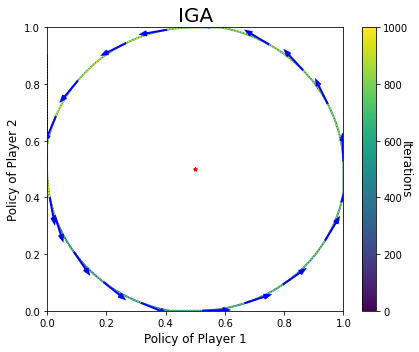

IGA Done


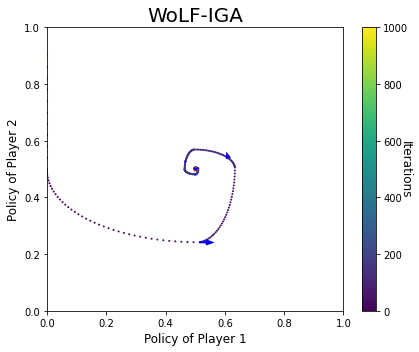

WoLF-IGA Done


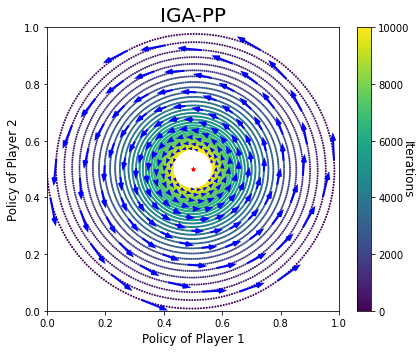

IGA-PP Done


In [6]:
agents = ['IGA', 'WoLF-IGA', 'IGA-PP']

for agent in agents:

  if agent == 'IGA':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = IGA(pi_alpha,
                                     pi_beta,
                                     payoff_0,
                                     payoff_1,
                                     u_alpha,
                                     u_beta,
                                     iteration=1000, # iteration number
                                     eta=0.01 # step size
                                    )
  elif agent == 'WoLF-IGA':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = WoLF_IGA(pi_alpha,
                                          pi_beta,
                                          payoff_0,
                                          payoff_1,
                                          u_alpha,
                                          u_beta,
                                          pi_alpha_nash=pi_alpha_nash,
                                          pi_beta_nash=pi_beta_nash,
                                          iteration=1000, # iteration number
                                          eta_min=0.01, # min step size
                                          eta_max=0.04 # max step size 
                                         )


  elif agent == 'IGA-PP':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = IGA_PP(pi_alpha,
                                        pi_beta,
                                        payoff_0,
                                        payoff_1,
                                        u_alpha,
                                        u_beta,
                                        iteration=10000, # iteration number
                                        eta=0.01, # step size
                                        gamma=0.01 # step size for policy prediction
                                       )


  plot_dynamics(pi_alpha_history,
                pi_beta_history,
                pi_alpha_gradient_history,
                pi_beta_gradient_history,
                agent)
  print('{} Done'.format(agent))

## Part II: Stochastic Game  (10 points)

### Problem Description

In this part, you are required to implement two agent to play the Stochastic Game, which has non-monotonicity reward and requires exploration to achieve the global optimal. 

There are $3$ intermediate states before arriving at the final state. The game transition and reward matrices are:

![Stochastic Game](https://raw.githubusercontent.com/mlii/mvrl/master/data/sg.png)

Given an initial reward matrix (shown in the middle of the above plot), the choice of joint action leads to different branches. For example, the joint action pair (0, 0) will lead to the left branch, while the joint action pair (1, 1) will lead to the branch on the right. Agents can observe the current step number and branch. Zero rewards lead to the termination state (shown as the red cross).

The optimal policy is to take the top left action pair (0, 0), and finally take the bottom right action pair (1, 1), resulting in a optimal total payoff of $8$.

This game is not easy, because it needs $3$-step exploration to discover the optimal policy, and is hard to deviate from sub-optimal (the right branch). Thus, using a strategic exploration approach is necessary.


In [7]:
import numpy as np


class StochasticGame():
    def __init__(self, episode_limit=5, good_branches=2, batch_size=None, **kwargs):
        # Define the agents
        self.n_agents = 2

        self.episode_limit = episode_limit

        # Define the internal state
        self.steps = 0

        r_matrix = [[1,1],[1,1]]
        self.payoff_values = [r_matrix for _ in range(self.episode_limit)]
        self.final_step_diff =[[1,1],[1,4]]

        self.branches = 4
        self.branch = 0

        self.n_actions = len(self.payoff_values[0])

        self.good_branches = good_branches

    def reset(self):
        """ Returns initial observations and states"""
        self.steps = 0
        self.branch = 0
        return self.get_obs()

    def step(self, actions):
        """ Returns reward, terminated, info """
        current_branch = 0
        if (actions[0], actions[1]) == (0,0):
            current_branch = 0
        if (actions[0], actions[1]) == (0,1):
            current_branch = 1
        if (actions[0], actions[1]) == (1,0):
            current_branch = 2
        if (actions[0], actions[1]) == (1,1):
            current_branch = 3

        if self.steps == 0:
            self.branch = current_branch

        info = {}

        info["good_payoff"] = 0
        info["branch"] = self.branch

        if self.good_branches == 4:
            reward = 1 if self.branch == current_branch else 0 # Need to follow your branch
        elif self.good_branches == 2:
            reward = 1 if self.branch in [0,3] and self.branch == current_branch else 0
        else:
            raise Exception("Environment not setup to handle {} good branches".format(self.good_branches))

        if self.episode_limit > 1 and self.steps == self.episode_limit - 1 and self.branch == 0:
            info["good_payoff"] = 1
            reward = self.final_step_diff[actions[0]][actions[1]]

        self.steps += 1

        if self.steps < self.episode_limit and reward > 0:
            terminated = False
        else:
            terminated = True

        info["episode_limit"] = False

        # How often the joint-actions are taken
        info["action_00"] = 0
        info["action_01"] = 0
        info["action_10"] = 0
        info["action_11"] = 0
        if (actions[0], actions[1]) == (0, 0):
            info["action_00"] = 1
        if (actions[0], actions[1]) == (0, 1):
            info["action_01"] = 1
        if (actions[0], actions[1]) == (1, 0):
            info["action_10"] = 1
        if (actions[0], actions[1]) == (1, 1):
            info["action_11"] = 1

        return self.get_obs(), [reward] * 2, [terminated] * 2, info

    def get_obs(self):
        """ Returns all agent observations in a list """
        one_hot_step = [0] * (self.episode_limit + 1 + self.branches)
        one_hot_step[self.steps] = 1
        one_hot_step[self.episode_limit + 1 + self.branch] = 1
        return [tuple(one_hot_step) for _ in range(self.n_agents)]

    def get_obs_agent(self, agent_id):
        """ Returns observation for agent_id """
        return self.get_obs()[agent_id]

    def get_obs_size(self):
        """ Returns the shape of the observation """
        return len(self.get_obs_agent(0))

    def get_state(self):
        return self.get_obs_agent(0)

    def get_state_size(self):
        """ Returns the shape of the state"""
        return self.get_obs_size()

    def get_total_actions(self):
        """ Returns the total number of actions an agent could ever take """
        return self.n_actions


### Example: Random Policy

A simple agent using random policy is provided below.

In [8]:
from collections import defaultdict
from functools import partial
from abc import ABCMeta, abstractmethod
import random

import numpy as np

def sample(pi):
  return np.random.choice(pi.size, size=1, p=pi)[0]

def normalize(pi):
    minprob = np.min(pi)
    if minprob < 0.0:
        pi -= minprob
    pi /= np.sum(pi)

class BaseQAgent:
    def __init__(self, name, action_num=2, phi=0.01, gamma=0.95, episilon=0.1, **kwargs):
        self.name = name
        self.action_num = action_num
        self.episilon = episilon
        self.gamma = gamma
        self.phi = phi
        self.epoch = 0
        self.Q = None
        self.pi = defaultdict(partial(np.random.dirichlet, [1.0] * self.action_num))

    def done(self):
        pass

    def act(self, observation, exploration=False):
        if exploration and random.random() < self.episilon:
            return random.randint(0, self.action_num - 1)
        else:
            return sample(self.pi[observation])

    @abstractmethod
    def update(self, observation, action, reward, next_observation, done):
        pass

    @abstractmethod
    def update_policy(self, observation, action):
        pass



### TODO: Implement an agent using Q-Learning (3 points)

Q-Learning is a single agent learning algorithm for finding optimal policies in MDPs. The key updating rule is as follwings:

$$
Q(s, a) \leftarrow(1-\phi) Q(s, a)+\phi\left(r+\gamma V\left(s^{\prime}\right)\right)
$$

where,
$$
V(s)=\max\left(\left[Q(s, a)_{a \in \mathcal{A}}\right]\right)
$$

In [9]:
class QAgent(BaseQAgent):
    def __init__(self, **kwargs):
        super().__init__('QAgent', **kwargs)
        self.Q = defaultdict(partial(np.random.rand, self.action_num))
        self.R = defaultdict(partial(np.zeros, self.action_num))
        self.count_R = defaultdict(partial(np.zeros, self.action_num))

    def done(self):
        self.R.clear()
        self.count_R.clear()

    def update(self, observation, action, reward, next_observation, done):
        self.count_R[observation][action] += 1.0
        self.R[observation][action] += (reward - self.R[observation][action]) / self.count_R[observation][action]
        Q = self.Q[observation]
        V = self.val(next_observation)
        
        if done:
            ########### TODO:Implement Q-Learning (Q updating for termination) (1 point) ###########
            # self.Q[observation][action] = 0
            self.Q[observation][action] = (1 - self.phi) * Q[action] + self.phi * reward
            ########### END TODO #####################################################
        else:
            ########### TODO:Implement Q-Learning (Q updating) (1 point) ###########
            self.Q[observation][action] = (1 - self.phi) * Q[action] + self.phi * (reward + self.gamma * V)
            ########### END TODO #####################################################
        
        self.update_policy(observation, action)
        self.epoch += 1

    def val(self, observation):
        ########### TODO:Implement Q-Learning (V) (1 point) ###########
        v = np.max(self.Q[observation])
        ########### END TODO ##########################################
        return v

    def update_policy(self, observation, action):
        Q = self.Q[observation]
        self.pi[observation] = (Q == np.max(Q)).astype(np.double)
        self.pi[observation] = self.pi[observation] / np.sum(self.pi[observation])
  

### Test your Q agents on the Stochastic Game

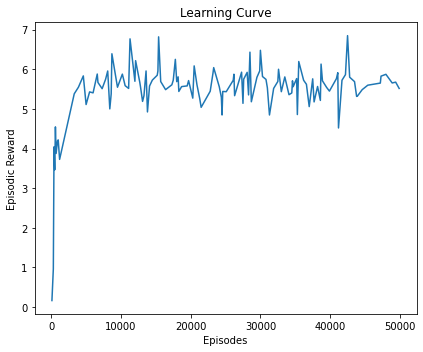

Test reward is: 8.0


In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy

def rollout(env, agents, exploration=True, max_iter=5000, log_episode_interval=100, verbose=False):
  history_reward = []
  state_n = env.reset()
  episode_reward = 0
  episode_count = 0
  recorded_episodes = []
  recorded_episode_reward = []
  for i in range(max_iter):
      actions = np.array([agent.act(state, exploration) for state, agent in zip(state_n, agents)])
      next_state_n, reward_n, done_n, _ = env.step(actions)
      episode_reward += np.mean(reward_n)
      for j, (state, reward, next_state, done, agent) in enumerate(zip(state_n, reward_n, next_state_n, done_n, agents)):
          agent.update(state, actions[j], reward, next_state, done)
      state_n = next_state_n
      if np.all(done_n):
          state_n = env.reset()
          history_reward.append(episode_reward)
          episode_reward = 0
          episode_count += 1
          if (i + 1) %  log_episode_interval == 0:
            recorded_episodes.append(i)
            episodes_mean_reward = np.mean(history_reward)
            recorded_episode_reward.append(episodes_mean_reward)
            history_reward = []
            if verbose:
                print('Episode {}, Reward {}'.format(i, episodes_mean_reward))
  return recorded_episodes, recorded_episode_reward


agent_num = 2
action_num = 2
agents = []
env = StochasticGame()
for i in range(agent_num):
    agent = QAgent(action_num=action_num, phi=0.01, gamma=0.99, episilon=0.1)
    agents.append(agent)

# Training
train_recorded_episodes, train_recorded_episode_reward = rollout(env=env, 
                                                                 agents=agents, 
                                                                 exploration=True, 
                                                                 max_iter=50000)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.plot(train_recorded_episodes, train_recorded_episode_reward)

ax.set_title("Learning Curve")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Episodes")
plt.tight_layout()
plt.show()

# Testing
test_recorded_episodes, test_recorded_episode_reward = rollout(env=env, 
                                                               agents=agents, 
                                                               exploration=False, 
                                                               max_iter=10, 
                                                               log_episode_interval=1)
print('Test reward is:', np.mean(test_recorded_episode_reward))

### TODO: Implement an Advanced Agent to solve the Stochastic Game (7 points)

Unless you are extremely lucky, the Q-learning agent implemented above is very hard to succeed in the Stochastic Game. In this part, you are required to implement a really cool agent to play the Stochastic Game. 

**Hint: You might want to use a strategic exploration approach.**

Points will be given based on the performance of your algorithm, e.g., if the test reward of your algorithm is 6, you will be given 6/8*9=6.75 points, since the optimal payoff is 8.

In [11]:
# You can write any code to implement your CoolAgent, please ouput
# action via the act(observation, exploration) method
class CoolAgent(BaseQAgent):
    def __init__(self, **kwargs):
        super().__init__('CoolAgent', **kwargs)
        # self.Q = defaultdict(partial(np.random.rand, self.action_num))
        
        # Changing the initialisation of Q values to encourage early exploration 
        self.Q = defaultdict(lambda: 16 * np.ones(self.action_num))
        self.R = defaultdict(partial(np.zeros, self.action_num))
        self.count_R = defaultdict(partial(np.zeros, self.action_num))
        
        # Max number of epochs to decay epsilon over
        self.N = 80000
        self.epsilon_start = 1.0
        self.epsilon_end = 0.05

    def episilon_decay(self):
        """
        Decays epsilon value over set number of epochs 
        Continues until the algorithm converges to epsilon-greedy
        """
        r = max((self.N - self.epoch + 10000) / self.N , 0)
        self.episilon = (self.epsilon_start - self.epsilon_end) * r + self.epsilon_end

    def done(self):
        self.R.clear()
        self.count_R.clear()

    def act(self, observation, exploration=False):
        if exploration and random.random() < self.episilon:
            return random.randint(0, self.action_num - 1)
        else:
            return sample(self.pi[observation])

    @abstractmethod
    def update(self, observation, action, reward, next_observation, done):
        self.count_R[observation][action] += 1.0
        self.R[observation][action] += (reward - self.R[observation][action]) / self.count_R[observation][action]
        Q = self.Q[observation]
        V = np.max(self.Q[next_observation])
        
        if done:
            ########### TODO:Implement Q-Learning (Q updating for termination) (1 point) ###########
            # self.Q[observation][action] = 0
            self.Q[observation][action] = (1 - self.phi) * Q[action] + self.phi * reward
            ########### END TODO #####################################################
        else:
            ########### TODO:Implement Q-Learning (Q updating) (1 point) ###########
            self.Q[observation][action] = (1 - self.phi) * Q[action] + self.phi * (reward + self.gamma * V)
            ########### END TODO #####################################################
        
        self.update_policy(observation, action)
        self.epoch += 1

        # Allow for early exploration with high learning rate
        if self.epoch > 10000:
          self.episilon_decay()
          self.phi = 0.05

    @abstractmethod
    def update_policy(self, observation, action):
        Q = self.Q[observation]
        self.pi[observation] = (Q == np.max(Q)).astype(np.double)
        self.pi[observation] = self.pi[observation] / np.sum(self.pi[observation])

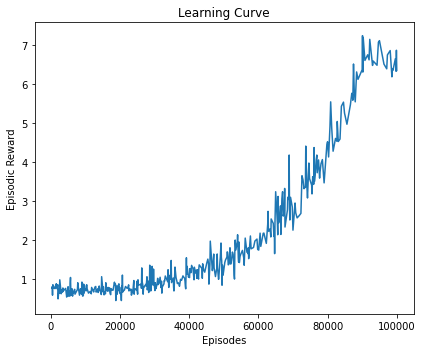

In [12]:
# Feel Free to write code here to train and tune your cool agents, 
# and assign the trained agents to cool_agents at the end
# ########################################
# TODO: Your cool agent training code #############

# For testing 
# fig = plt.figure(figsize=(6, 5))
# ax = fig.add_subplot(111)

# for i in range(10):
#   agent_num = 2
#   action_num = 2
#   agents = []
#   env = StochasticGame()
#   for i in range(agent_num):
#       agent = CoolAgent(action_num=action_num, phi=0.5, gamma=0.99, episilon=0.9)
#       agents.append(agent)

#   # Training
#   train_recorded_episodes, train_recorded_episode_reward = rollout(env=env, 
#                                                                   agents=agents, 
#                                                                   exploration=True, 
#                                                                   max_iter=100000)
  
#   ax.plot(train_recorded_episodes, train_recorded_episode_reward)

#   cool_agents = agents
#   cool_env = StochasticGame()
#   test_cool_recorded_episodes, test_cool_recorded_episode_reward = rollout(env=cool_env, 
#                                                                         agents=cool_agents, 
#                                                                         exploration=False, 
#                                                                         max_iter=10, 
#                                                                         log_episode_interval=1)
#   print('Cool agent\'s test reward is:', np.mean(test_cool_recorded_episode_reward))

agent_num = 2
action_num = 2
agents = []
env = StochasticGame()
for i in range(agent_num):
    agent = CoolAgent(action_num=action_num, phi=0.5, gamma=0.99, episilon=0.9)
    agents.append(agent)

# Training
train_recorded_episodes, train_recorded_episode_reward = rollout(env=env, 
                                                                agents=agents, 
                                                                exploration=True, 
                                                                max_iter=100000)


fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.plot(train_recorded_episodes, train_recorded_episode_reward)

ax.set_title("Learning Curve")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Episodes")
plt.tight_layout()
plt.show()


# ########################################
cool_agents = agents

In [13]:
# Cool agent evaluation code, please do not change
cool_env = StochasticGame()
test_cool_recorded_episodes, test_cool_recorded_episode_reward = rollout(env=cool_env, 
                                                                        agents=cool_agents, 
                                                                        exploration=False, 
                                                                        max_iter=10, 
                                                                        log_episode_interval=1)
print('Cool agent\'s test reward is:', np.mean(test_cool_recorded_episode_reward))

Cool agent's test reward is: 8.0


Few words to analysis the results comparing to the Q Agent, and what you have did to improve the performance. (< 300 words)

The cool agent is mostly similar to the basic Q Agent, using the base update policy and actions. The critical distinction is that this approach uses high epsilon initialisation with epsilon-decay to reduce explorations and increase exploitation over time.

This approach improves over the basic model by allowing for early exploration of different pathways, and after many episodes, the likelihood of exploration decreases. This approach leads to optimal exploitation later in training.

To allow the model to learn fast early on, phi was also set to be high, 0.5, in the early exploration stage (first 10,000 epochs) before being reset to 0.05. This approach quickly removed any bad pathways. 

This approach was combined with optimistic initialisation of Q values (Q = 1 for all state-action pairs), further encouraging exploration.




## Part III: Cournot Duopoly (12 points)

Cournot Duopoly is a classic static game that models the imperfect competition in which multiple firms compete in price and production to capture market share.
Since the firms' actions are continuous variables, the game is a continuous action setting.
It is a **nonzero-sum game** (neither team-based nor zero-sum) which represents a challenge for current MARL methods.

Let $a_i\in [-A_i,A_i]$ represents the set of actions for agent $i\in\{1,2\ldots, N\}:=\mathcal{N}$,
where $A_i\in \mathbb{R}_{>0}$.
Each agent $i$'s reward (profit) is 
$$
R_i(a_i,a_{-i})=g_i(a_i,a_{-i})+ w_i(a_i),
$$
where
$
\partial^{2} g_{i} / \partial a_{i}^{2}<0, \partial g_{i} / \partial a_{-i}<0
$,and 
$\partial^{2} g_{i} / \partial a_{i} \partial a_{-i}<0
$.
Agents adopt Markov policies as
$
a_{i} = \pi_i(a_{-i}).
$


#### TODO: Assume $N=2$, prove that policy $\pi_i$ is non-increasing. (5 points)



Your answer here.

We seek to prove,

$$
\pi_i(a_{-i}) \le \pi_i(\bar{a}_{-i})
\space\space
\forall 
\space
 a_{-i} > \bar{a}_{-i}
$$

Or equvilantly that the action $a_i \le \bar{a}_i$ given that $a_{-i} > \bar{a}_{-i}$. Here we define the action $a_i$ as the qauntity of product produced by company $i$ and similarly $a_{-i}$ as the qauntity of product produced by company $-i$. Similarly we define $g_i(a_i, a_{-i})$ as the revenue generated for company $i$ when a given quantity of product is produced by $-i$ and $i$. $w_i(a_i)$ is the cost of producing and selling the product for comapny $i$ which takes a strictly negagative value, thus the profit generated for company $i$, $R_i(a_i, a_{-i})$, is: 

$$
R_i(a_i, a_{-i}) = g_i(a_i, a_{-i}) + w_i(a_i)
$$

In this case we assume that $\pi_i(a_{-i})$ is the optimal policy (best response) for agent/company $i$ to play given the actions of $-i$, i.e.

$$
R_i(\pi_i(a_{-i}), a_{-i}) \ge R_i(\pi_i(\bar{a}_{-i}), \bar{a}_{-i}) 
\space\space
\forall 
\space
a_{-i} > \bar{a}_{-1}
$$

If we consider the change in revenue for company $i$ as it increases output $a_i$ as company $-i$ increases output $a_{-i}$:

$$
  \frac{ \partial^{2} g_{i}}
  {\partial a_{i} \partial a_{-i}} 
  = \frac{ \partial}{\partial a_{-i}} (
  \frac{ \partial g_{i}}{\partial a_{i}} )
  < 0
$$

We can see that revenues decrease for agent $i$ if it increases output, as agent $-i$ increases output. Given the sign of this partial derivative is negative we can say they from $i$'s perspective, $-i$ product is a strategic substitute. 

If we assume $w(a_i)$ is stricly negative, i.e. an increase in output from $i$ will alwalys lead to a stricly more negative value, we can see that increasing output under these constrains will always lead to decreased revenue, and increased costs.  

Further we can see that holding output constant whilst $a_{-i}$ is increasing will decrease revenues whilst holding costs constant, from:

$$
  \frac{ \partial g_i}{\partial a_{-i}} < 0
$$

Thus, holding output constant or increasing output both lead to a decrease in profits. 

We know that the function is convave from:

$$
  \frac{ \partial^2 g_i}{\partial a_{i}^2} < 0
$$

Meaning that the rate of increase in revenue for agent $i$ is decreasing as output increases. This means that a small decrease in output will lead to a relatively smaller decrease in revenue. If we assume $w(a_i)$ has a linear relationship with $a_i$, then we can see that the best response $\pi_i(a_{-i})$ for agent $i$ is to decrease output when agent $-i$ increases output.



#### TODO: Set up Cournot Duopoly game. (2 points)



Suppose that 
$$
g_i=a_i(\alpha -\beta\sum_{j\in\mathcal{N}}a_j),
w_i=\gamma a_i.
$$
We choose $A_i=1.0, \forall i\in\mathcal{N}$ and $\alpha=1.5, \beta=1.0, \gamma=-0.5$.

In [14]:
import numpy as np
import gym

class CournotDuopoly(gym.Env):
    def __init__(self, agent_num=2, action_range=(-1., 1.)):
        self.agent_num = agent_num
        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(1,))
        self.rewards = np.zeros((self.agent_num,))
        self.t = 0

        alpha = 1.5
        beta = 1.0
        gamma = -0.5

        def payoff_n_cournot(action_n, i):
            """
            Define the payoff function R_i(a_i,a_{-i}).
            :param action_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
            :param i: agent index
            :return: R_i(a_i,a_{-i})
            """
            ########### TODO: Compute R_i(a_i,a_{-i}) (1 point) ###########
            g_i = action_n[i] * (alpha - beta * np.sum(action_n))
            w_i = gamma * action_n[i]
            r = g_i + w_i
            ########### END TODO ############################
            return r

        def payoff_n_cournot_derivative(action_n, i):
            """
            Define the partial derivative of the payoff function R_i(a_i,a_{-i}) w.r.t. a_i.
            :param action_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
            :param i: agent index
            :return: \partial R_i(a_i,a_{-i}) / \partial a_i
            """
            ########### TODO: Compute \partial R_i(a_i,a_{-i}) / \partial a_i (1 point) ###########
            dr = alpha + gamma - beta * ((np.sum(action_n) + action_n[i]))
            ########### END TODO ############################
            return dr
        
        self.payoff = payoff_n_cournot
        self.payoff_n_derivative = payoff_n_cournot_derivative

    def step(self, action_n):
        """
        Define the environment step function.
        :param action_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
        :return: state_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
        :return: reward_n: (nd.array) a list of all agents' states, shape is (agent_num,)
        :return: done_n: (nd.array) a list of all agents' done status, shape is (agent_num,)
        :return: info: (dict) a dictionary of customized information
        """
        actions = np.array(action_n).reshape((self.agent_num,))
        reward_n = np.zeros((self.agent_num,))
        payoff_derivative_n = np.zeros((self.agent_num,))
        for i in range(self.agent_num):
            payoff_derivative_n[i] = self.payoff_n_derivative(actions, i)
            reward_n[i] = self.payoff(actions, i)
        self.rewards = reward_n
        state_n = np.array(list([[0.0 * i] for i in range(self.agent_num)]))
        info = {'reward_n': reward_n, 'reward_n_derivative': payoff_derivative_n}
        done_n = np.array([True] * self.agent_num)
        self.t += 1
        # print("state_n, reward_n, done_n, info", state_n, reward_n, done_n, info)
        return state_n, reward_n, done_n, info

    def reset(self):
        return np.array(list([[0.0 * i] for i in range(self.agent_num)]))

    def get_rewards(self):
        return self.rewards
    
    def render(self, mode="human", close=False):
        pass

    def terminate(self):
        pass


#### TODO: Implement MADDPG agents to play the Cournot Duopoly Game. (3 points)


Implement the MADDPG algorithm presented in the paper:
[Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments](https://arxiv.org/pdf/1706.02275.pdf).

In [15]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import os

class Actor(nn.Module):
    def __init__(self):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.action_out = nn.Linear(64, 1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        actions = torch.tanh(self.action_out(x))
        return actions


class Critic(nn.Module):
    def __init__(self, obs_shape, action_shape):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(obs_shape + action_shape, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.q_out = nn.Linear(64, 1)

    def forward(self, state, action):
        state = torch.cat(state, dim=1)
        action = torch.cat(action, dim=1)
        x = torch.cat([state, action], dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        q_value = self.q_out(x)
        return q_value


class MADDPG:
    def __init__(self, n_agents, agent_id, obs_shape=1, action_shape=1):
        self.n_agents = n_agents
        self.agent_id = agent_id
        self.action_shape = action_shape
        self.train_step = 0
        self.lr_actor = 1e-4
        self.lr_critic = 1e-3
        self.tau = 0.01
        self.gamma = 0.95

        # create the network
        self.actor_network = Actor()
        self.critic_network = Critic(obs_shape * self.n_agents,
                                     action_shape * self.n_agents)

        # build up the target network
        self.actor_target_network = Actor()
        self.critic_target_network = Critic(obs_shape * self.n_agents,
                                            action_shape * self.n_agents)

        # load the weights into the target networks
        self.actor_target_network.load_state_dict(self.actor_network.state_dict())
        self.critic_target_network.load_state_dict(self.critic_network.state_dict())

        # create the optimizer
        self.actor_optim = torch.optim.Adam(self.actor_network.parameters(), lr=self.lr_actor)
        self.critic_optim = torch.optim.Adam(self.critic_network.parameters(), lr=self.lr_critic)

    # soft update
    def _soft_update_target_network(self):
        for target_param, param in zip(self.actor_target_network.parameters(),
                                       self.actor_network.parameters()):
            ########### TODO: Soft-update target actor network (0.5 point) ###########
            target_param.data.copy_((self.tau * param.data) + (1 - self.tau) * target_param.data)
            ########### END TODO ############################

        for target_param, param in zip(self.critic_target_network.parameters(),
                                       self.critic_network.parameters()):
            ########### TODO: Soft-update target critic network (0.5 point) ###########
            target_param.data.copy_((self.tau * param.data) + (1 - self.tau) * target_param.data)
            ########### END TODO ############################

    # update the network
    def train(self, transitions, other_agents):
        for key in transitions.keys():
            transitions[key] = torch.tensor(transitions[key], dtype=torch.float32)
        r = transitions['r_%d' % self.agent_id]
        o, u, o_next = [], [], []
        for agent_id in range(self.n_agents):
            o.append(transitions['o_%d' % agent_id])
            u.append(transitions['u_%d' % agent_id])
            o_next.append(transitions['o_next_%d' % agent_id])

        # calculate the target Q value function
        u_next = []
        with torch.no_grad():
            index = 0
            for agent_id in range(self.n_agents):
                if agent_id == self.agent_id:
                    u_next.append(self.actor_target_network(o_next[agent_id]))
                else:
                    u_next.append(other_agents[index].actor_target_network(o_next[agent_id]))
                    index += 1
            q_next = self.critic_target_network(o_next, u_next).detach()

            ########### TODO: Calculate the target Q value function (0.5 point) ###########
            target_q = (r.unsqueeze(1) + self.gamma * q_next).detach()
            ########### END TODO ############################

        # the q loss
        q_value = self.critic_network(o, u)
        ########### TODO: Calculate the critic loss (0.5 point) ###########
        critic_loss = ((target_q - q_value) ** 2).mean()
        ########### END TODO ############################

        # the actor loss
        u[self.agent_id] = self.actor_network(o[self.agent_id])
        ########### TODO: Calculate the actor loss (0.5 point) ###########
        actor_loss = -(self.critic_network(o, u)).mean()
        ########### END TODO ############################
        # update the network
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()

        self._soft_update_target_network()
        self.train_step += 1

    def select_action(self, o, noise_rate, epsilon):
        if np.random.uniform() < epsilon:
            u = np.random.uniform(-1.0, 1.0, self.action_shape)
        else:
            inputs = torch.tensor(o, dtype=torch.float32).unsqueeze(0)
            ########### TODO: Take action based on the actor network (0.5 point) ###########
            u = self.actor_network(inputs).squeeze(0)
            # Convert back to numpy and add noise 
            u = u.cpu().numpy()
            u +=  noise_rate * np.random.randn(u.size)
            u = np.clip(u, -1.0, 1.0)
            ########### END TODO ############################
        return u.copy()

    def learn(self, transitions, other_agents):
        self.train(transitions, other_agents)


#### Some useful scripts (please execute).


In [16]:
import threading

class Buffer:
    def __init__(self, n_agents=5):
        self.n_agents = n_agents
        self.size = int(5e5)
        # memory management
        self.current_size = 0
        # create the buffer to store info
        self.buffer = dict()
        for i in range(self.n_agents):
            self.buffer['o_%d' % i] = np.empty([self.size, 1])
            self.buffer['u_%d' % i] = np.empty([self.size, 1])
            self.buffer['r_%d' % i] = np.empty([self.size])
            self.buffer['o_next_%d' % i] = np.empty([self.size, 1])
        # thread lock
        self.lock = threading.Lock()

    # store the episode
    def store_episode(self, o, u, r, o_next):
        idxs = self._get_storage_idx(inc=1)
        for i in range(self.n_agents):
            with self.lock:
                self.buffer['o_%d' % i][idxs] = o[i]
                self.buffer['u_%d' % i][idxs] = u[i]
                self.buffer['r_%d' % i][idxs] = r[i]
                self.buffer['o_next_%d' % i][idxs] = o_next[i]
    
    # sample the data from the replay buffer
    def sample(self, batch_size):
        temp_buffer = {}
        idx = np.random.randint(0, self.current_size, batch_size)
        for key in self.buffer.keys():
            temp_buffer[key] = self.buffer[key][idx]
        return temp_buffer

    def _get_storage_idx(self, inc=None):
        inc = inc or 1
        if self.current_size+inc <= self.size:
            idx = np.arange(self.current_size, self.current_size+inc)
        elif self.current_size < self.size:
            overflow = inc - (self.size - self.current_size)
            idx_a = np.arange(self.current_size, self.size)
            idx_b = np.random.randint(0, self.current_size, overflow)
            idx = np.concatenate([idx_a, idx_b])
        else:
            idx = np.random.randint(0, self.size, inc)
        self.current_size = min(self.size, self.current_size+inc)
        if inc == 1:
            idx = idx[0]
        return idx

def evaluate(env, agents, agent_num, evaluate_episodes, evaluate_episode_len):
    returns = []
    for episode in range(evaluate_episodes):
        # reset the environment
        s = env.reset()
        rewards_n = np.zeros(agent_num)
        rs = []
        alist = []
        rewards1 = 0
        for time_step in range(evaluate_episode_len):
            actions = []
            with torch.no_grad():
                for agent_id, agent in enumerate(agents):
                    action = agent.select_action(s[agent_id], 0, 0)
                    actions.append(action)
            s_next, r, done, info = env.step(actions)
            if type(info['reward_n']) is list:
                rewards_n += np.sum(info['reward_n'])
            else:
                rewards_n += info['reward_n'].squeeze()

            s = s_next
        returns.append(rewards_n)
    s = env.reset()
    mean_return = sum(returns) / evaluate_episodes

    return mean_return


#### Test your implemented MADDPG agent in the Cournot Duopoly Game.


  1%|          | 232/20000 [00:08<22:28:37,  4.09s/it]

[-2.60183099  4.27377632 -1.33221186 -1.14182228  0.19728806]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  5%|▌         | 1010/20000 [00:33<1:57:48,  2.69it/s]

[0.23732971 0.25464886 0.24808693 0.23062892 0.22715195]


 10%|█         | 2007/20000 [01:05<1:53:22,  2.65it/s]

[1.67836692 1.77984837 1.76865582 1.72064996 1.69233895]


 15%|█▌        | 3008/20000 [01:35<1:44:43,  2.70it/s]

[2.10508139 2.23740481 2.18706172 2.1565544  2.08875913]


 20%|██        | 4008/20000 [02:06<1:38:16,  2.71it/s]

[1.81340498 1.94679484 1.89099868 1.89304392 1.8120583 ]


 25%|██▌       | 5008/20000 [02:37<1:32:58,  2.69it/s]

[2.13647107 2.2733987  2.27046425 2.23091465 2.19062604]


 30%|███       | 6008/20000 [03:09<1:26:40,  2.69it/s]

[1.72525197 1.89123572 1.83564982 1.79870918 1.76287088]


 35%|███▌      | 7009/20000 [03:40<1:20:16,  2.70it/s]

[1.84016096 1.8461408  1.82291194 1.86592909 1.83260571]


 40%|████      | 8007/20000 [04:12<1:16:18,  2.62it/s]

[2.15914471 2.23153488 2.1991736  2.18880574 2.18010295]


 45%|████▌     | 9007/20000 [04:44<1:08:23,  2.68it/s]

[1.92605479 2.03308069 2.0218625  2.00946178 1.9472381 ]


 50%|█████     | 10006/20000 [05:16<1:05:16,  2.55it/s]

[1.5786904  1.63196857 1.62687819 1.61731226 1.58427882]


 55%|█████▌    | 11009/20000 [05:49<1:11:35,  2.09it/s]

[1.96303226 2.04872511 2.08889605 2.01639269 2.04482731]


 60%|██████    | 12005/20000 [06:21<1:10:51,  1.88it/s]

[2.35676697 2.46184159 2.42952465 2.42497792 2.41502841]


 65%|██████▌   | 13009/20000 [06:53<44:24,  2.62it/s]  

[2.04144022 2.14731783 2.1379792  2.09926491 2.07105472]


 70%|███████   | 14009/20000 [07:26<38:31,  2.59it/s]

[1.78066086 1.8290961  1.83352463 1.8509847  1.83301097]


 75%|███████▌  | 15006/20000 [07:58<32:26,  2.57it/s]

[2.00382452 2.09570205 2.03277319 2.02953933 2.00924475]


 80%|████████  | 16005/20000 [08:31<36:22,  1.83it/s]

[1.48415604 1.51035162 1.50425455 1.50617073 1.46884627]


 85%|████████▌ | 17005/20000 [09:03<27:20,  1.83it/s]

[1.79757845 1.82986195 1.83745786 1.86193073 1.83142812]


 90%|█████████ | 18005/20000 [09:35<18:06,  1.84it/s]

[1.53926746 1.59184372 1.58704707 1.60406567 1.56930061]


 95%|█████████▌| 19005/20000 [10:07<09:07,  1.82it/s]

[2.08058104 2.15605889 2.15950044 2.09901564 2.09551865]


100%|██████████| 20000/20000 [10:31<00:00, 31.66it/s]


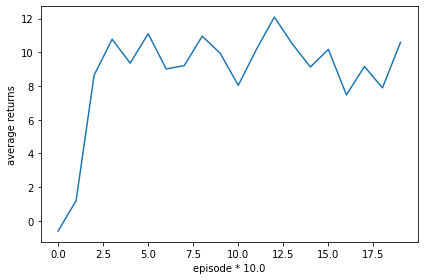

In [17]:
from tqdm import tqdm
import matplotlib.pyplot as plt

noise = 0.1
epsilon = 0.1
episode_limit = 100
n_agents = 5
batch_size = 256
evaluate_rate = 1000
time_steps = 20000
evaluate_episode_len = 100
evaluate_episodes = 100
env = CournotDuopoly(agent_num=n_agents)
agents = [MADDPG(n_agents, i, obs_shape=1, action_shape=1) for 
          i in range(n_agents)]
buffer = Buffer(n_agents=n_agents)

returns = []
done = None
mean_return_eval = 0.
for time_step in tqdm(range(time_steps)):
    if time_step % episode_limit == 0 or np.all(done):
        s = env.reset()
    u = []
    actions = []
    with torch.no_grad():
        for agent_id, agent in enumerate(agents):
            action = agent.select_action(s[agent_id], noise, epsilon)
            u.append(action)
            actions.append(action)

    s_next, r, done, info = env.step(actions)
    buffer.store_episode(s[:n_agents], u,
                         r[:n_agents], s_next[:n_agents])

    s = s_next

    if buffer.current_size >= batch_size:
        transitions = buffer.sample(batch_size)
        for agent in agents:
            other_agents = agents.copy()
            other_agents.remove(agent)
            agent.learn(transitions, other_agents)

    if time_step == 0 or time_step % evaluate_rate == 0:
        mean_return_eval = evaluate(env, agents, n_agents,
                                    evaluate_episodes, evaluate_episode_len)
        returns.append(mean_return_eval)
        print(mean_return_eval)
plt.figure()
plt.plot(range(len(returns)), np.array(returns).sum(-1))
plt.xlabel('episode * ' + str(evaluate_rate / episode_limit))
plt.ylabel('average returns')
plt.tight_layout()
plt.show()

#### TODO: Analyze the performance of your implemented MADDPG algorithm. Describe the reason if it's not playing well.(2 points)

*Hint: Cournot Monopoly is a nonzero-sum game.*

Generally, the MADDPG converged to an equilibrium value around 12-13. This represents a good performance. 

The Cournot duopoly game is neither fully cooperative nor full competitive (zero-sum) but is a general sum game where agents can jointly optimise their actions to achieve a better individual reward. The highest average reward is achieved when all agents select their action to achieve the globally maximum reward (nash-equilibrium). 

The main advantage of the MADDPG algorithm here is that it uses a Critic network with full information to update each agents action in training. This means that if an agent acts to maximise its own rewards, which results in a globally sub-optimal reward, the agent is punished through the critic.

This method improves the DDPG approach by incorporating a centralised critic network that incorporates information from the environment and other agents, enabling coordination and higher global reward. This approach means the agents can better handle the non-stationary environment with other agents also acting. 

## Part IV: Deep Multi-Agent Reinforcement Learning (18 points)

For this part of the coursework, you will implement your choice of any deep reinforcement learning algorithms (e.g., DQN, DRQN, or PPO) in a multi-agent setting and get to see it work on the `Switch-n` environment from ma-gym. Please read [the wiki of ma-gym](https://github.com/koulanurag/ma-gym/wiki/) first.

### Environment Example
#### Switch2-v0
![Switch-2](https://raw.githubusercontent.com/koulanurag/ma-gym/master/static/gif/Switch2-v0.gif)
#### Switch4-v0
![Switch-4](https://raw.githubusercontent.com/koulanurag/ma-gym/master/static/gif/Switch4-v0.gif)

`Switch-n` is a grid world environment having `n agents` where each agent wants to move their corresponding home location (marked in boxes outlined in same colors).
Each agent receives only it's local position coordinates. The challenging part of the game is to pass through the narrow corridor through which only one agent can pass at a time. They need to coordinate to not block the pathway for the other. A reward of +5 is given to each agent for reaching their home cell. The episode ends when both agents has reached their home state or for a maximum of 100 steps in environment.

Action Space: `0: Down, 1: Left, 2: Up , 3: Right, 4: Noop`

Agent Observation : `Agent Coordinate + Steps in env.`

Best Score: `NA`

### Download Requirements and Set the Environment
The following command will download the required scripts and set up the environment. 

In [18]:
!rm -rf /content/ma-gym  
!git clone https://github.com/koulanurag/ma-gym.git 
%cd /content/ma-gym 
!pip install -q -e . 
!apt-get install -y xvfb python-opengl x11-utils > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1
!apt-get install x11-utils
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
# !pip install -U gym[atari] > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

Cloning into 'ma-gym'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 981 (delta 16), reused 32 (delta 8), pack-reused 931
Receiving objects: 100% (981/981), 3.72 MiB | 15.04 MiB/s, done.
Resolving deltas: 100% (479/479), done.
/content/ma-gym
Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Requirement already up-to-date: setuptools in /usr/local/lib/python3.7/dist-packages (54.1.1)


In [19]:
%matplotlib inline
import gym
import ma_gym
from ma_gym.wrappers import Monitor
import matplotlib.pyplot as plt
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

#### Example of playing Switch2-v0 Using Random Policy

In [20]:
env = wrap_env(gym.make("Switch2-v0")) # Use "Switch4-v0" for the Switch-4 game
done_n = [False for _ in range(env.n_agents)]
ep_reward = 0

obs_n = env.reset()
while not all(done_n):
    obs_n, reward_n, done_n, info = env.step(env.action_space.sample())
    ep_reward += sum(reward_n)
    env.render()
env.close()
# To improve the training efficiency, render() is not necessary during the training.
# We provide the render and video code here just want to demonstrate how to debugging and analysis.
show_video()

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### TODO: Implement a Deep MARL Agent to Play Switch2-v0 (12 points)
Implement your own choice of any deep MARL algorithms to play the Switch2-v0 game.

**Requirements**

*   Implement your own algorithms, rather than a simple `import` from any other existing algorithm frameworks.
* TensorFlow 2.0+ or PyTorch 1.4+ are recommended.
*   Your algorithm has to be Multi-Agent, i.e., policy input should be the observation/ state for each corresponding agent, not for all agents.

**Required contents**

*   All your codes
*   Learning Curve (reward with respect to training iterations/ episodes)
*   Description of your code and performance analysis (no more than 500 words)



#### Code for Playing Switch2-v0


#### Deep Q-Network (DQN)

**Define the parameters and the networks**

In [21]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import os

# Define the network achitectures
class Parameters:
  """
  Class to hold the network parameters, can be easily changed for new games 
  or enviroments
  """
  def __init__(self, n_actions=None, n_agents=None, 
               obser_shape=None, hidden_size=128, 
               lr=0.005, gamma=0.95, batch_size=64,
               buffer_size=10000, sync_target_net=200,
               epsilon_start=0.95, epsilon_end=0.002, 
               decay_len=20000, training_len=2000,
               agent_type='ddqn', tau=0.01, soft=True):
    """
    Inputs:
    n_actions: Number of actions
    n_agents:  Number of agents
    lr:  Learning rate
    obser_shape: Shape of observations
    hidden_size: Number of hidden units in hidden layers
    batch_size: Number of steps in batch
    buffer_size: The size of the replay buffer
    sync_target_net: time steps between snyching the maina and target network
    """

    self.agent_type = agent_type
    self.tau = tau 
    self.soft = soft

    self.n_actions = n_actions
    self.n_agents = n_agents
    self.lr = lr
    self.obser_shape = obser_shape
    self.hidden_size = hidden_size

    # Discount rate
    self.gamma = gamma 
    # Batch size
    self.batch_size = batch_size
    # Buffer size
    self.buffer_size = buffer_size
    # Target network sync
    self.sync_target_net = sync_target_net

    # Set epsilon start and end values
    self.epsilon_start = epsilon_start
    self.epsilon_end = epsilon_end
    self.decay_len = decay_len
    # Set training time 
    self.training_len = training_len

####Define the Deep Q-Learning agents

In [22]:
class Q_Network(nn.Module):

  def __init__(self, observation_shape, n_actions, hidden_size): 
    """
    observation_shape: Shape of the observation for agent 
    n_actions: Number of actions available to the agent
    hidden_size: Determines the size of the network hidden layers
    """
    super(Q_Network, self).__init__()
    self.fc1 = nn.Linear(observation_shape, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size * 2)
    self.fc3 = nn.Linear(hidden_size * 2, hidden_size // 2)
    self.fc4 = nn.Linear(hidden_size // 2, n_actions)

  def forward(self, inputs): 
    """
    Forward for three layer network
    Output gives Q approximation for each action at state S given observations
    """
    x = F.relu(self.fc1(inputs))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    output = self.fc4(x)
    return output

#### Define the DQN Agent

In [23]:
import random

class DQN_Agent:

  def __init__(self, parameters):
    # Set the parameters for the agent and network
    self.agent_id = None
    self.agent_type = parameters.agent_type
    assert self.agent_type in ('ddqn', 'dqn')

    self.n_actions = parameters.n_actions
    self.obser_shape = parameters.obser_shape
    self.hidden_size = parameters.hidden_size
    self.lr = parameters.lr

    # Target online net snyc stratergy
    self.soft = parameters.soft
    self.sync_target_net = parameters.sync_target_net
    self.tau = parameters.tau

    # Set the discount rate
    self.gamma = parameters.gamma
    
    # Set the epislon value and epislon decay rate
    self.epsilon_start = parameters.epsilon_start
    self.epsilon_end = parameters.epsilon_end
    self.epsilon_decay = (self.epsilon_start - self.epsilon_end) / parameters.decay_len
    self.epsilon = self.epsilon_start
    
    # Set the Training / Testing parameters
    self.train_step = 0
    self.evaluate = False
    
    # Initialise the experience replay buffer
    self.buffer = Buffer(parameters.buffer_size)
    self.batch_size = parameters.batch_size

    # Set the device for Torchc 'cuda' or 'cpu'
    self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print("Agent using {} for training".format(self.device))

    # Create the network
    self.agent_network = Q_Network(self.obser_shape, 
                                   self.n_actions, 
                                   self.hidden_size).to(self.device)
    # The target network
    self.target_network = Q_Network(self.obser_shape, 
                                    self.n_actions,
                                    self.hidden_size).to(self.device)
    # Load the weights into the target networks
    self.target_network.load_state_dict(self.agent_network.state_dict())
    # Create the optimizer
    self.optim = torch.optim.Adam(self.agent_network.parameters(), lr=self.lr)
    # Set the loss
    self.criterion = nn.MSELoss()

  def act(self, state):
    """
    Take the current sate and selects and action
    """
    # If below a threshold then explore randomly
    if random.random() < self.epsilon and not self.evaluate:
      action = random.randint(0, self.n_actions - 1)
      return action
    # Otherwise return based on q values
    else:
      with torch.no_grad():
        state = torch.from_numpy(state).type(torch.float).unsqueeze(0).to(self.device)
        # Get Q estimates for state
        q_values = self.agent_network(state)
        # Select the action with the highest value
        action = torch.argmax(q_values).cpu().item()
        return action

  def step(self, state, action, reward, done, new_state):
    """
    Take a step and store statistics
    """
    self.train_step += 1

    # Ensure the values are stored as torch tensors
    state = torch.tensor(state, dtype=torch.float, device=self.device)
    action = torch.tensor([action], dtype=torch.long, device=self.device)
    reward = torch.tensor([reward], dtype=torch.float, device=self.device)
    done = torch.tensor([done], dtype=torch.bool, device=self.device)
    new_state = torch.tensor(new_state, dtype=torch.float, device=self.device)
    # Store values in replay buffer
    self.buffer.append(state, action, reward, done, new_state)

    # If the buffer is too small, continue
    if len(self.buffer) < self.batch_size:
        return

    # If soft update then use theat
    if self.soft: 
      for target_param, online_param in zip(self.target_network.parameters(), self.agent_network.parameters()):
        new_target_param = self.tau * online_param + (1 - self.tau) * target_param
        target_param.data.copy_(new_target_param)
    # Or if hard, sync the target network with the main network every now and then
    elif self.train_step % self.sync_target_net == 0:
      self.target_network.load_state_dict(self.agent_network.state_dict())

    # Get a sample of values from the buffer
    experiences = self.buffer.sample(self.batch_size)
    batch = Experience(*zip(*experiences))

    # Extract the individual feature and sent to torch tensors
    states_v = torch.stack(batch.state)
    rewards_v = torch.cat(batch.reward)
    actions_v = torch.cat(batch.action)
    dones = ~torch.cat(batch.done)
    new_states_v = torch.stack(batch.new_state)

    # Get Q values for state action pair for the action taken
    Q_values = self.agent_network(states_v).gather(1, actions_v.unsqueeze(1))
    
    # If DDQN
    if self.agent_type == 'ddqn':
      on_policy_actions = self.agent_network(new_states_v).max(1).indices.detach()
      target_Q_values = self.target_network(new_states_v).detach().gather(1, on_policy_actions.unsqueeze(1)).squeeze(1)
    elif self.agent_type == 'dqn':
      # Get Target Q value for next state
      target_Q_values = self.target_network(new_states_v).max(1).values.detach()
    
    # Take discounted temperal difference
    td = target_Q_values * self.gamma * dones + rewards_v
    # Calculate the loss using MSE
    loss = self.criterion(Q_values, td.unsqueeze(1))
    # Take optimizer step, and backpropogate
    self.optim.zero_grad()
    loss.backward()
    self.optim.step()

    # Decay epsilon value
    self.epsilon = max(self.epsilon - self.epsilon_decay, self.epsilon_end)

    return loss.cpu().item()
  

#### Buffer and Evaluation

In [24]:
import collections

# Create a names tuple in order to store the step values
Experience = collections.namedtuple("Experience", 
                                    field_names=["state", 
                                                 "action", 
                                                 "reward", 
                                                 "done", 
                                                 "new_state"])

class Buffer: 
  """
  Stores the S, A, R, S' tuple for each time step
  These can be randomly sampled from the buffer for training
  This is knowns as experience replay 
  """
  
  def __init__(self, buffer_size):
    # Create a buffer using deque of size = buffer_size
    self.buffer = collections.deque(maxlen=buffer_size)

  def __len__(self):
    return len(self.buffer)

  def append(self, state, action, reward, done, new_state):
    """
    Takes the experience of one step and stores in the buffe as a single tuple
    """
    experience = Experience(state, action, reward, done, new_state)
    self.buffer.append(experience)

  def sample(self, batch_size):
    """
    Gets a random sample of experiance in buffer
    Sample size = batch_size
    """
    return random.sample(self.buffer, k=batch_size)

#### Train the DQN agents

In [25]:
def train_DQN(enviroment='Switch2-v0',
              agent_type='ddqn',
              training_length=1000,
              decay_scheduale=30000,
              verbose=True,
              render=True, 
              render_every=250,
              store_2=True):
  """
  Takes a predfined gym enviroment and trains for sequence length.
  If verbose is true then we will print results as we go and render a video

  Outputs:
  episodes_rewards: Total rewards recieved per episode 
  total_loss: Loss at each time step
  agents: Trained agents
  agents_complete: list of complete or not-complete episodes
  """

  # Define the gym enviroment
  env = wrap_env(gym.make(enviroment))
  max_steps = 50

  # Set the added observation space
  if store_2:
    observation_size = 2 * env.observation_space[0].shape[0] + 1
  else:
    observation_size = env.observation_space[0].shape[0] + 1

  # Set the parameters of the agents
  switch_parameters = Parameters(agent_type=agent_type,
                                 n_actions=env.action_space[0].n,
                                 n_agents=env.n_agents,
                                 obser_shape=observation_size,
                                 training_len=training_length,
                                 decay_len=decay_scheduale)

  # Results lists
  training_rewards = []
  # Number of agents complete
  num_complete = []
  # Storing the total loss
  total_loss = []

  # Init the agents
  agents = []
  for i in range(switch_parameters.n_agents):
    agent = DQN_Agent(switch_parameters)
    agent.agent_id = i
    agents.append(agent)

  if verbose:
    print("{} {} agents initialised".format(len(agents), agent_type))

  # Loop through and train agents
  for episode in range(1, training_length + 1):

    # Reset the enivorment and get first observation
    obs = env.reset()
    # Store added if we wanted prev obs
    if store_2:
      pred_obs = obs

    # Set the is done mask to false for all agents
    is_done = [False for _ in agents]
    # Set the episode statistics
    episode_reward = 0
    episode_steps = 0
    episode_loss = 0
    agents_home = [False for _ in agents]

    # Loop steps in episode until done
    while not all(is_done):

      # Init actions
      actions = [-1 for _ in agents]
      # Init the loss for step
      time_step_loss = 0
      
      # get an action for each agent
      for agent in agents:
        if store_2:
          actions[agent.agent_id] = agent.act(np.array(obs[agent.agent_id] + pred_obs[agent.agent_id] + [episode_steps/max_steps], dtype=np.float32))
        else:
        # Take action based on the state and the number of steps taken
          actions[agent.agent_id] = agent.act(np.array(obs[agent.agent_id] + [episode_steps/max_steps], dtype=np.float32))

      # Get the rewards, next state, is_done from enviroment
      next_obs, rewards, is_done, _ = env.step(actions)

      # If on a render run, render the enviroment
      if render and episode % render_every == 0:
        env.render()

      # Store the experience in the buffer for each agent and take a training step
      for agent in agents:
        if store_2:
          state = np.array(obs[agent.agent_id] + pred_obs[agent.agent_id] + [episode_steps/max_steps], dtype=np.float32)
          new_state = np.array(next_obs[agent.agent_id] + obs[agent.agent_id] + [(episode_steps+1)/max_steps], dtype=np.float32)
        else:
          state = np.array(obs[agent.agent_id] +[episode_steps/max_steps], dtype=np.float32)
          new_state = np.array(next_obs[agent.agent_id] + [(episode_steps+1)/max_steps], dtype=np.float32)

        action = actions[agent.agent_id]
        reward = rewards[agent.agent_id] 

        # If the agent has made it home then set counter to true
        if reward == 5:
          agents_home[agent.agent_id] = True

        done = is_done[agent.agent_id]
        
        # Takes a step - stores this timesteps values, 
        # then takes a sample from the replay buffer and updates the Q-network
        # Returns the loss for this batch
        loss = agent.step(state, action, reward, done, new_state)
        time_step_loss += loss if loss else 0

      # Update episode reward and steps
      episode_reward += sum(rewards)
      episode_steps += 1
      total_loss.append(time_step_loss)
      # Set observation for next step
      pred_obs = obs
      obs = next_obs

    # Save rewards
    training_rewards.append(episode_reward)
    # If all agents make it home in the run then store
    num_complete.append(len([_ for agent in agents_home if agent is True]))

    # Print stats if at key point
    if verbose and episode % render_every == 0:
      print("Epside: {}, Reward {}".format(episode, episode_reward))
      print("Current epsilon value: {}".format(agents[0].epsilon))
      print("Training step: {}".format(agents[0].train_step))

    if render and episode % render_every == 0:
      show_video()

  return total_loss, training_rewards, num_complete, agents

In [26]:
total_loss, training_rewards, agents_complete, agents = train_DQN(agent_type='ddqn', render=False)
print("Final loss: {}".format(total_loss[-1]))
print("Final Reward: {}".format(training_rewards[-1]))
print("Final Agents complete: {}".format(agents_complete[-1]))

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Agent using cuda for training
Agent using cuda for training
2 ddqn agents initialised
Epside: 250, Reward -4.900000000000006
Current epsilon value: 0.5855887999997635
Training step: 11595
Epside: 500, Reward -9.999999999999996
Current epsilon value: 0.26788239999955743
Training step: 21649
Epside: 750, Reward 7.6
Current epsilon value: 0.06264039999956147
Training step: 28144
Epside: 1000, Reward 7.8
Current epsilon value: 0.002
Training step: 31273
Final loss: 0.21276873350143433
Final Reward: 7.8
Final Agents complete: 2


#### Plot the Learning Curve

Calculate the rolling mean and standard deviation each 10 step 

In [27]:
import seaborn as sns
import pandas as pd

def plots(data=training_rewards, name='Rewards'):

  sns.set_style("darkgrid")
  y_data = np.array(data)

  x_vals = np.arange(0, y_data.shape[0], 10)
  x_data = np.repeat(x_vals, 10)

  df = pd.DataFrame({'bucket': x_data, 'values': y_data}, columns=["bucket", "values"])
  
  fig = sns.lineplot(x="bucket", y="values", data=df)

  plt.title("Mean {} over ten episodes".format(name))
  plt.xlabel('Episode')
  plt.ylabel('Mean {}'.format(name))
  plt.show()

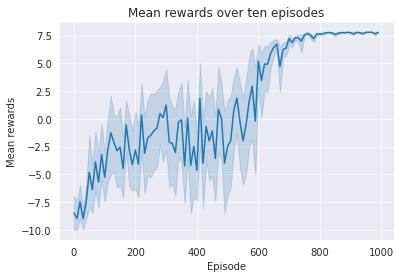

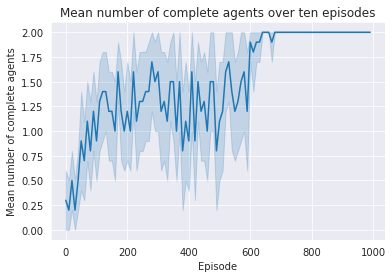

In [28]:
plots(data=training_rewards, name='rewards')

plots(data=agents_complete, name='number of complete agents')

### Test Code

In [29]:
def test_DQN(agents, enviorment='Switch2-v0', render=True, store_2=True): 

  # Define the gym enviroment
  env = wrap_env(gym.make(enviorment))
  max_steps = 50

  for agent in agents:
    agent.evaluate = True

  # Results lists
  test_reward = 0
  # Number of agents complete
  num_complete = 0

  # Reset the enivorment and get first observation
  obs = env.reset()
  # Store added if we wanted prev obs
  if store_2:
    pred_obs = obs

  episode_steps = 0

  # Set the is done mask to false for all agents
  is_done = [False for _ in agents]

  # Loop steps in episode until done
  while not all(is_done):

    # Init actions
    actions = [-1 for _ in agents]
    
    # get an action for each agent
    for agent in agents:
      if store_2:
        actions[agent.agent_id] = agent.act(np.array(obs[agent.agent_id] + pred_obs[agent.agent_id] + [episode_steps/max_steps], dtype=np.float32))
      else:
      # Take action based on the state and the number of steps taken
        actions[agent.agent_id] = agent.act(np.array(obs[agent.agent_id] + [episode_steps/max_steps], dtype=np.float32))

    # Get the rewards, next state, is_done from enviroment
    next_obs, rewards, is_done, _ = env.step(actions)

    # If on a render run, render the enviroment
    if render:
        env.render()

    # Increment home counter
    for agent in agents:
      if rewards[agent.agent_id] == 5:
          num_complete += 1

  
    # Update episode reward and steps
    test_reward += sum(rewards)
    episode_steps += 1
    # Set observation for next step
    pred_obs = obs
    obs = next_obs

  if render:
    env.close()
    show_video()

  for agent in agents:
    agent.evaluate = False

  return test_reward, num_complete

### Test run 

In [30]:
test_reward, num_complete = test_DQN(agents=agents, enviorment='Switch2-v0', render=True, store_2=True)
print("Test Reward: {}".format(test_reward))
print("Final Reward: {}".format(training_rewards[-1]))
print("Number of agents complete: {}".format(num_complete))

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Test Reward: 7.8
Final Reward: 7.8
Number of agents complete: 2


### Analysis on performance

Overall, DQN and, more specifically, Double Deep Q-Network, performs well on Switch2. The agents converge to an optimal policy after 700 episodes, with a consistent test score of 7.8. 

The critical issue in this task is that the environment is non-stationary from the agents perspective, violating the Markov assumptions. Although the agents are not explicitly able to communicate using DDQN, they can build an implicit model of the environment, including the other agent, when the other agents policy is sufficiently stable. 

Thus after an initial exploratory phase with a high epsilon value used to help the agents find the path to the reward home plate, the epsilon value is decayed down to a small value (0.002). In this low exploratory phase, one agent learns to go first whilst the other gradually learns to wait. This may be suboptimal from the waiting agents perspective, but this is a Nash Equilibrium. We can see this, as if the waiting agent deviates and tries to pass the corridor early, it will collide with the other agent. A collision in the corridor will lead to lower rewards for both agents. Thus any attempt to move early for the waiting agent will be punished. 

Further adaptations to improve convergence and stability were:


*   Use a Double DQN rather than DQN, where the new target Q values is defined by:
$$
  y^{target} = 
  R_{t+1}+\gamma Q(S_{t+1}, argmax_{a}(Q(S_{t+1},a;\theta_t);\theta_t')
$$ 
DDQN aims to decouple action selection from evaluation, thus reducing value overestimation.

*   Add the previous agent observation with the current observation and the number of steps taken as the state value. This approach enables the agent to incorporate more knowledge of its environment and its place in it. 
$$
  S_t = obs_t + obs_{t-1} + steps_t
$$

*   Use a target network 'soft update' policy as defined in MADDPG. This improves convergence by gradually maintaining similarity between the online and target network, rather than abruptly copying the parameters after a set number of steps. 

### TODO: Implement a Deep MARL Agent to Play Switch4-v0 (6 points)
Implement your own choice of any deep MARL algorithms to play the Switch4-v0 game.

**Requirements**

Same reuqiremnts as Switch2-v0 game. You can put emphasis on what differences between Switch2-v0 and Switch4-v0 and what improvements you have done.



#### Code for Playing Switch4-v0


In [31]:
total_loss, training_rewards, agents_complete, agents = train_DQN(enviroment='Switch4-v0', 
                                                                  agent_type='ddqn', 
                                                                  training_length=1500, 
                                                                  decay_scheduale=30000, 
                                                                  render=False)
print("Final loss: {}".format(total_loss[-1]))
print("Final Reward: {}".format(training_rewards[-1]))
print("Final Agents complete: {}".format(agents_complete[-1]))

Agent using cuda for training
Agent using cuda for training
Agent using cuda for training
Agent using cuda for training
4 ddqn agents initialised


/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Epside: 250, Reward -19.999999999999993
Current epsilon value: 0.5590131999997463
Training step: 12436
Epside: 500, Reward -19.999999999999993
Current epsilon value: 0.1731455999995635
Training step: 24647
Epside: 750, Reward 10.8
Current epsilon value: 0.002
Training step: 36603
Epside: 1000, Reward 14.400000000000002
Current epsilon value: 0.002
Training step: 45209
Epside: 1250, Reward 14.400000000000002
Current epsilon value: 0.002
Training step: 49858
Epside: 1500, Reward 14.400000000000002
Current epsilon value: 0.002
Training step: 53925
Final loss: 0.1465696138329804
Final Reward: 14.400000000000002
Final Agents complete: 4


#### Plot the Learning Curve

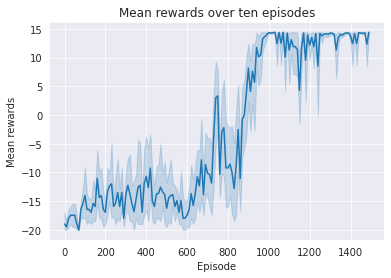

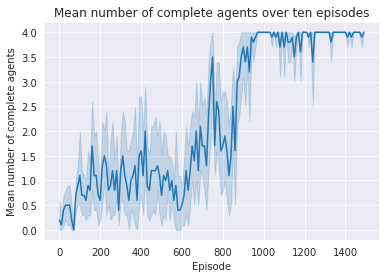

In [32]:
plots(data=training_rewards, name='rewards')

plots(data=agents_complete, name='number of complete agents')

### Test the agents

In [33]:
test_reward, num_complete = test_DQN(agents=agents, enviorment='Switch4-v0', render=True, store_2=True)
print("Test Reward: {}".format(test_reward))
print("Final Reward: {}".format(training_rewards[-1]))
print("Number of agents complete: {}".format(num_complete))

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Test Reward: 14.400000000000002
Final Reward: 14.400000000000002
Number of agents complete: 4


#### Analysis on Performance

No changes were made for the four-player version of Switch other than an extended $\epsilon$-decay time, increased from 20,000 to 30,000. This change enabled a slightly longer exploratory phase because the agents found it harder to reach home plate because of the added congestion. However, after the exploratory phase, where each agent learned the optimal route to its plate, the epsilon value was decayed down to 0.0001 again so the agents could optimise each other's policy. 

Somewhat surprisingly, the agents converged after a similar number of episodes as in the two-player game, requiring approximately 700 episodes. The optimal result was approximately 14.5. 

Again, we can see that the Nash equilibrium is for one agent to act greedily and move first whilst the other agents wait. Then each agent takes it in turns to go, whilst the most 'altruistic waits until the end. Any deviation from this strategy will lead to congestion in the corridor and reduced rewards for all agents. 

There is a considerable first-mover advantage in this game, with the first agent to act greedily gaining the highest rewards, whilst the other agent must learn to act around this strategy. 

This approach's major drawback is that the total rewards are hypersensitive to individual actions, with a small deviation leading to a breakdown in coordination and lower rewards for all. This instability could 
potentially be improved on using an ensemble of policies, leading to some more robust strategies. 

Overall, DDQN, with the highlighted additions above, proves to be an effective approach form both Switch2 and Switch4. The same hyperparameters set proved effective in both games with only a small change to the epsilon decay schedule. 